In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=198b8f835424a8854d9cfc15267934ee


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oriximina
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | flinders
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ballina
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | savannah bight
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | okato
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | llanes
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | mitsamiouli
Processing Record 22 of Set 1 | barentsburg

Processing Record 38 of Set 4 | grootegast
Processing Record 39 of Set 4 | ixtapa
Processing Record 40 of Set 4 | altos del rosario
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | cabalawan
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 45 of Set 4 | monrovia
Processing Record 46 of Set 4 | honningsvag
Processing Record 47 of Set 4 | abohar
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | bismarck
Processing Record 50 of Set 4 | evensk
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | tabou
Processing Record 3 of Set 5 | clarence town
Processing Record 4 of Set 5 | trelew
Processing Record 5 of Set 5 | lively
Processing Record 6 of Set 5 | broken hill
Processing Record 7 of Set 5 | rocha
Processing Record 8 of Set 5 | kudahuvadhoo
Processing Record 9 of Set 5 | port hardy
Processing Record 10 of Set 5 | bethel
Processing Record

Processing Record 31 of Set 8 | bend
Processing Record 32 of Set 8 | batalha
Processing Record 33 of Set 8 | aklavik
Processing Record 34 of Set 8 | rungata
City not found. Skipping...
Processing Record 35 of Set 8 | east london
Processing Record 36 of Set 8 | mana
Processing Record 37 of Set 8 | tomatlan
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | mehamn
Processing Record 40 of Set 8 | lushunkou
City not found. Skipping...
Processing Record 41 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 42 of Set 8 | we
City not found. Skipping...
Processing Record 43 of Set 8 | georgetown
Processing Record 44 of Set 8 | palmares do sul
Processing Record 45 of Set 8 | kon tum
Processing Record 46 of Set 8 | byron bay
Processing Record 47 of Set 8 | porto-vecchio
Processing Record 48 of Set 8 | shelby
Processing Record 49 of Set 8 | ust-omchug
Processing Record 50 of Set 8 | calabozo
Processing Record 1 of Set 9 | kaitangata
Processing Rec

Processing Record 19 of Set 12 | poum
Processing Record 20 of Set 12 | lengshuitan
Processing Record 21 of Set 12 | thomasville
Processing Record 22 of Set 12 | minab
Processing Record 23 of Set 12 | madang
Processing Record 24 of Set 12 | hovd
Processing Record 25 of Set 12 | carbonia
Processing Record 26 of Set 12 | itau de minas
Processing Record 27 of Set 12 | cairns
Processing Record 28 of Set 12 | juneau
Processing Record 29 of Set 12 | lagoa
Processing Record 30 of Set 12 | itoman
Processing Record 31 of Set 12 | hommelvik
Processing Record 32 of Set 12 | port shepstone
Processing Record 33 of Set 12 | arcata
Processing Record 34 of Set 12 | dedza
Processing Record 35 of Set 12 | la palma
Processing Record 36 of Set 12 | lalomanu
City not found. Skipping...
Processing Record 37 of Set 12 | issia
Processing Record 38 of Set 12 | freetown
Processing Record 39 of Set 12 | fortuna
Processing Record 40 of Set 12 | mahajanga
Processing Record 41 of Set 12 | poddorye
Processing Record 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oriximina,-1.7656,-55.8661,89.60,52,8,3.89,BR,2021-05-31 19:39:58
1,Cabo San Lucas,22.8909,-109.9124,99.52,61,1,12.66,MX,2021-05-31 19:37:13
2,Avarua,-21.2078,-159.7750,75.25,64,20,5.75,CK,2021-05-31 19:36:32
3,Flinders,-34.5833,150.8552,48.20,88,100,1.01,AU,2021-05-31 19:36:20
4,Rikitea,-23.1203,-134.9692,74.43,65,0,14.12,PF,2021-05-31 19:40:00
5,Ballina,-28.8667,153.5667,55.36,88,90,2.30,AU,2021-05-31 19:38:20
6,Port Elizabeth,-33.9180,25.5701,54.10,77,32,12.82,ZA,2021-05-31 19:36:48
7,Savannah Bight,16.4500,-85.8500,89.65,76,0,20.09,HN,2021-05-31 19:40:01
8,Arraial Do Cabo,-22.9661,-42.0278,73.26,88,75,5.75,BR,2021-05-31 19:37:03
9,Mataura,-46.1927,168.8643,38.39,97,69,2.71,NZ,2021-05-31 19:35:58


In [11]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oriximina,BR,2021-05-31 19:39:58,-1.7656,-55.8661,89.60,52,8,3.89
1,Cabo San Lucas,MX,2021-05-31 19:37:13,22.8909,-109.9124,99.52,61,1,12.66
2,Avarua,CK,2021-05-31 19:36:32,-21.2078,-159.7750,75.25,64,20,5.75
3,Flinders,AU,2021-05-31 19:36:20,-34.5833,150.8552,48.20,88,100,1.01
4,Rikitea,PF,2021-05-31 19:40:00,-23.1203,-134.9692,74.43,65,0,14.12
5,Ballina,AU,2021-05-31 19:38:20,-28.8667,153.5667,55.36,88,90,2.30
6,Port Elizabeth,ZA,2021-05-31 19:36:48,-33.9180,25.5701,54.10,77,32,12.82
7,Savannah Bight,HN,2021-05-31 19:40:01,16.4500,-85.8500,89.65,76,0,20.09
8,Arraial Do Cabo,BR,2021-05-31 19:37:03,-22.9661,-42.0278,73.26,88,75,5.75
9,Mataura,NZ,2021-05-31 19:35:58,-46.1927,168.8643,38.39,97,69,2.71


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622490225.6679602

In [15]:
today = time.strftime('%x')
today

'05/31/21'

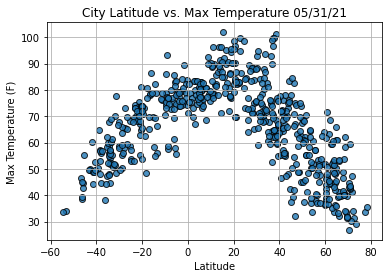

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

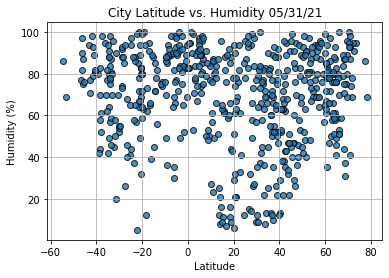

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

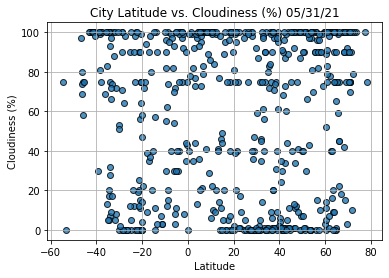

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

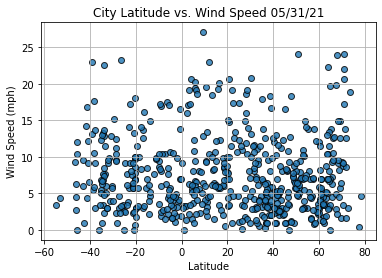

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cabo San Lucas,MX,2021-05-31 19:37:13,22.8909,-109.9124,99.52,61,1,12.66
7,Savannah Bight,HN,2021-05-31 19:40:01,16.4500,-85.8500,89.65,76,0,20.09
10,Qaanaaq,GL,2021-05-31 19:36:31,77.4840,-69.3632,33.62,86,100,0.40
12,Dikson,RU,2021-05-31 19:36:58,73.5069,80.5464,29.17,95,100,18.88
13,Ust-Nera,RU,2021-05-31 19:40:10,64.5667,143.2000,50.41,83,100,2.98
...,...,...,...,...,...,...,...,...,...
569,Monterey,US,2021-05-31 19:42:24,36.2505,-121.2516,92.71,13,9,4.07
571,Valdemarpils,LV,2021-05-31 19:43:44,57.3707,22.5919,51.22,64,96,7.09
572,Adre,TD,2021-05-31 19:43:44,13.4667,22.2000,89.10,25,77,9.95
573,Selma,US,2021-05-31 19:43:45,36.5708,-119.6121,99.09,12,6,6.35


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cabo San Lucas,MX,2021-05-31 19:37:13,22.8909,-109.9124,99.52,61,1,12.66
7,Savannah Bight,HN,2021-05-31 19:40:01,16.4500,-85.8500,89.65,76,0,20.09
10,Qaanaaq,GL,2021-05-31 19:36:31,77.4840,-69.3632,33.62,86,100,0.40
12,Dikson,RU,2021-05-31 19:36:58,73.5069,80.5464,29.17,95,100,18.88
13,Ust-Nera,RU,2021-05-31 19:40:10,64.5667,143.2000,50.41,83,100,2.98


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

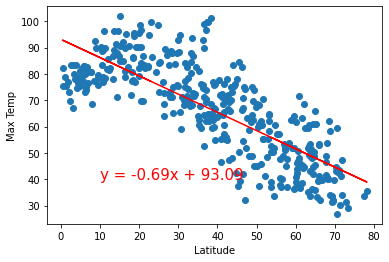

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

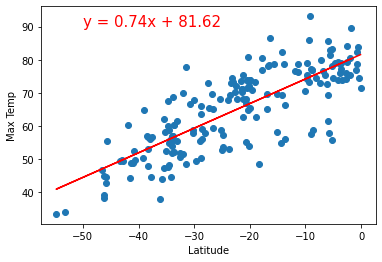

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

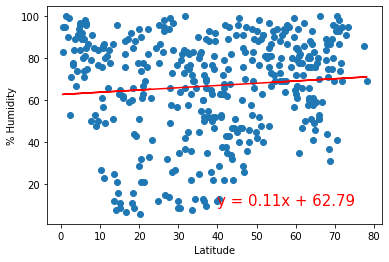

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

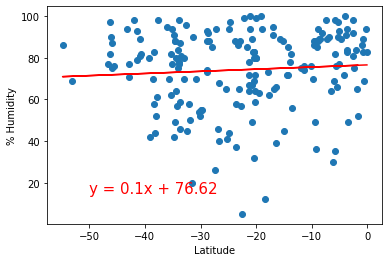

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

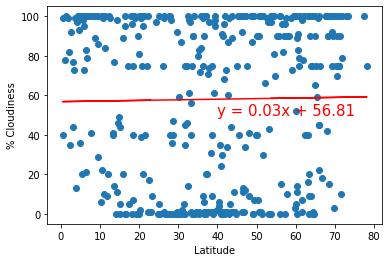

In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

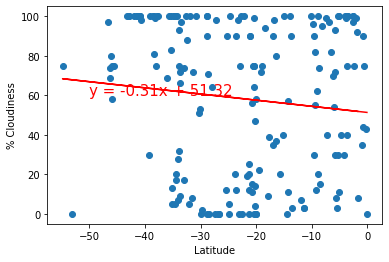

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

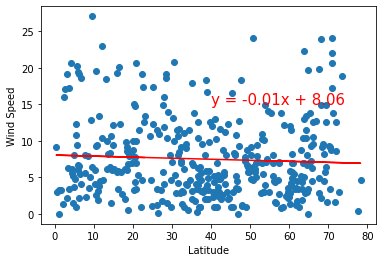

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

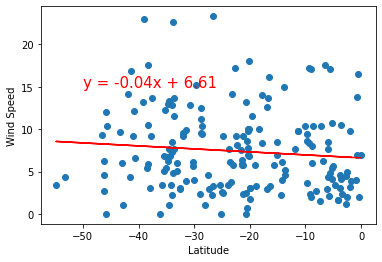

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))